### Kaggle_Digit_Recognizer

#### Import Libraries

In [45]:
import numpy as np
import pandas as pd

#import network module
import src.network as network

#import plotting/Visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Set custom plotting values
mpl.rcParams['figure.figsize']=(8,8)
mpl.rcParams['lines.linewidth']=4
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['xtick.labelsize']=20
mpl.rcParams['ytick.labelsize']=20
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['lines.markersize'] = 1000
mpl.rcParams['legend.fontsize'] = 18

In [46]:
filepath = "/home/pandit/DataScience/CodingNest/Projects/Classifications/Logistic Regression/Digit-Recognizer/"
training_data = pd.read_csv(filepath+'train.csv')
test_data = pd.read_csv(filepath + 'test.csv')

In [47]:
training_data.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
test_data.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's take a quick detour to see what the images look like. We arbitrarily choose the second image in the training set (index from zero, so value 1 is the second image). The image is printed with 28 pixels to a row so as to make the digit in the image obvious.





In [49]:
network.print_image(training_data, 1)



  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0  18  30 137 137 192  86  72   1   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0  13  86 250 254 254 254 254 217 246 151  32   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0  16 179 254 254 254 254 254 254 254 254 254 231  54  15   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0  72 254 254 254 254 254 254 254 254 254 254 254 254 104   0   0   0   0   0   0   0 

  0   0   0   0   0   0  61 191 254 254 254 254 254 109  83 199 254 254 254 254 243  8

In [50]:
# .iloc[1,0] chooses the second row (second image) and 
# first column (label) of the training dataset.
print ('Image Label {}'.format(training_data.iloc[1,0]))

Image Label 0


### Data Wrangling

Now let's actually see how many images we're working with in each set and start manipulating the data.



In [51]:
training_data.info()
print("\n")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


We see that our training set contains 42,000 images while our test set has 28,000 images. Note also that as expected, we have the correct number of columns for each (785 and 784 respectively).


Let's separate our training data into a training set and a validation set. The training set will be used to fit our model and then we'll validate the model with the remaining data in the validation set. For simplicity, we fit using the first 40,000 images in the training set and validate against the last 2,000 entries. For ease of working with the data, we pull it from our dataframe into a numpy array and then format it using the function format_data. This is done for our training and validation set (for more details on the output format, consult the function defined in network.py).


For our test data, we follow the same procedure but perform the formatting in the cell below and obviously do not have a label for each image. Note that the code requires a shape of (784,1) rather than (784,) for correct performance of numpy routines. Also note that we normalize the pixel values to be in the range $[0,1]$ rather than $[0,255]$. This is needed for the values that we later input into the sigmoid function to make sense.

In [54]:
#Create data sets
train_ar=np.array(training_data.iloc[:40000])
valid_ar=np.array(training_data.iloc[40000:42000])
test_ar=np.array(test_data)

# format training and validation set
train_list = network.format_data (train_ar)
valid_list = network.format_data (valid_ar)
train_list = list(train_list)
valid_list = list(valid_list)

# format the test data
test_list = [np.reshape(x, (784,1))/255 for x in test_ar]

Neural Network Application
Validation Pass

Now let's create a neural network. We call the class name Network and give our network one hidden layer with 30 nodes. The choice of one hidden layer and the exact number of nodes is arbitrary at this point. Note that we also have an initial layer of 784 nodes (one node per pixel) and an output layer of 10 nodes, one for each possible digit $[0,9]$. Note that for this choice of layers and nodes, we have two weight matrices of dimensions (30, 784) and (10, 30). Our biases on each layer are vectors of dimension (30, 1) and (10, 1).

We then perform stochastic gradient descent on the network by calling the class function SGD. The idea is that this routine calculates the derivatives of a defined cost function as a function of the weights and biases. We tune the weights and biases so as to minimize this cost function, here defined as the square difference between the output on the last layer of 10 nodes and the correct result. For example, suppose our network for image $i$ with label 2 gives the output,

$$\text{approx}_i = [0, 0.2, 0.7, 0, 0.1, 0, 0, 0, 0, 0.3] \enspace .$$
Our cost function for this output is then given as the difference between it and the exact output ,

$$\text{exact}_i = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] \enspace ,$$$$\text{cost}_i = (\text{approx}_i - \text{exact}_i)^2 \enspace ,$$
where only the 3rd entry changes as that corresponds to digit 2 (again indexing starts at 0).

The gradient descent is costly to calculate for all images, so we sample this stochastically with some subset of images. The difference between regular gradient descent, where we always take a step to absolutely minimize the cost function, and stochastic gradient descent (SGD), where the step is done probabilistically, is illustrated in the figure below. Note the difference in how the two methods approach the minimum of the function.

title

image credit: https://wikidocs.net/3413
The stochastic gradient is also multiplied by some number (called the learning parameter) to give greater or lesser importance to it. A small learning parameter means we move more slowly (but surely) through the state space while a bigger parameter lets us move quicker (but perhaps less accurately). This whole process is then repeated for several 'epochs' so as to train the network and optimize the biases/weights. After each epoch, we output the number of images in the validation set that have been correctly classified. For much more detail, again see the book by Michael Nielsen (chapters 1 and 2).

The Network class function SGD is here called with 30 epochs of training, 10 images chosen for the gradient averaging, and a learning parameter of 3. At this point, these choices are arbitrary and are not necessarily optimized. The results of each epoch of training are stored in eval_list and the ultimate output after all epochs are finished are the trained biases and weights of the network.



In [53]:
# list values denotes number of nodes in each layer
net = network.Network([784, 30, 10])

# create blank list to store results
eval_list = []

# call SGD function and store final biases and weights
(biases, weights) = net.SGD(train_list, 30, 10, 3.0, test_data = valid_list, store_eval = eval_list)


Epoch 0: 1615 / 2000
Epoch 1: 1634 / 2000
Epoch 2: 1824 / 2000
Epoch 3: 1835 / 2000
Epoch 4: 1836 / 2000
Epoch 5: 1838 / 2000
Epoch 6: 1843 / 2000
Epoch 7: 1845 / 2000
Epoch 8: 1856 / 2000
Epoch 9: 1862 / 2000
Epoch 10: 1862 / 2000
Epoch 11: 1863 / 2000
Epoch 12: 1860 / 2000
Epoch 13: 1867 / 2000
Epoch 14: 1872 / 2000
Epoch 15: 1871 / 2000
Epoch 16: 1871 / 2000
Epoch 17: 1879 / 2000
Epoch 18: 1882 / 2000
Epoch 19: 1876 / 2000
Epoch 20: 1877 / 2000
Epoch 21: 1881 / 2000
Epoch 22: 1878 / 2000
Epoch 23: 1870 / 2000
Epoch 24: 1867 / 2000
Epoch 25: 1870 / 2000
Epoch 26: 1875 / 2000
Epoch 27: 1875 / 2000
Epoch 28: 1875 / 2000
Epoch 29: 1881 / 2000


We can plot this information to see the rapid improvement with each epoch of training. After a few epochs, the network saturates around a given accuracy.

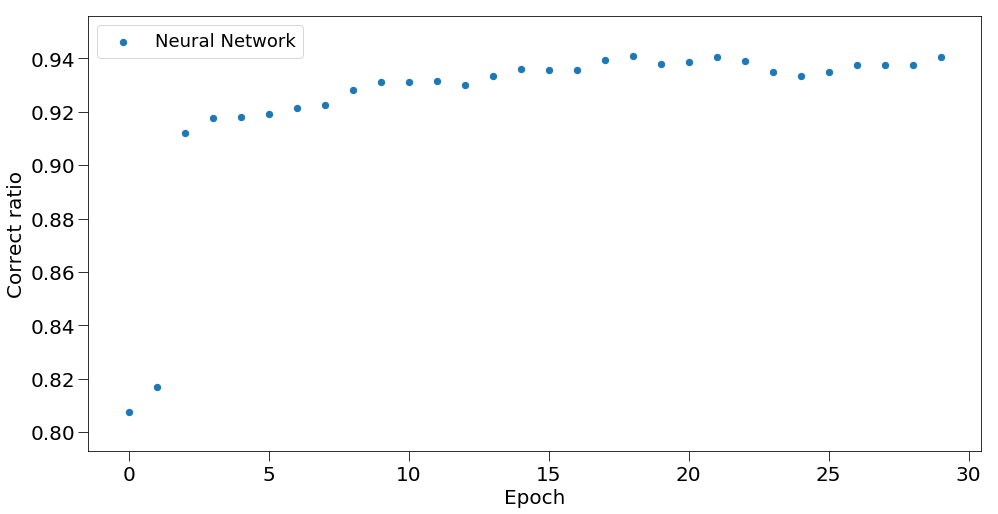

In [56]:
plt.figure(figsize=(16,8))
epoch_list = [a for a in range (0,len(eval_list))]

# plot the function and data
plt.scatter(epoch_list, eval_list, s=40, label="Neural Network")
plt.xlabel ("Epoch")
plt.ylabel ("Correct ratio")
plt.legend()
plt.show()

### Network Testing


Now we're ready to test our neural network on the test data for which we don't have a label. As the feedforward function defined in our Network class relies on using the class defined biases and weights, let's define our own version here. This function takes in the 784 input activations a for a given image and then cycles this information through the network with our trained biases & weights. The final output is a (10,1) vector that holds our activation values for each digit. The maximum entry on this vector then gives our prediction for a given image.



In [57]:
def feedforward(a, biases, weights):
    for b, w in zip(biases, weights):
        a = network.sigmoid(np.dot(w, a)+b)
    return a

Now we just proceed as before only using the full set of training data on the network.





In [58]:
# list values denotes number of nodes in each layer
full_net = network.Network([784, 30, 10])

# create data sets
full_train_ar = np.array(training_data.iloc[:42000])

# format training and validation set
full_train_list = network.format_data (full_train_ar)
full_train_list = list(full_train_list)

# call SGD function and store final biases and weights
(full_biases, full_weights) = full_net.SGD(full_train_list, 30, 10, 3.0)

Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete
Epoch 11 complete
Epoch 12 complete
Epoch 13 complete
Epoch 14 complete
Epoch 15 complete
Epoch 16 complete
Epoch 17 complete
Epoch 18 complete
Epoch 19 complete
Epoch 20 complete
Epoch 21 complete
Epoch 22 complete
Epoch 23 complete
Epoch 24 complete
Epoch 25 complete
Epoch 26 complete
Epoch 27 complete
Epoch 28 complete
Epoch 29 complete


To generate our predictions, again we take the maximum value on the (10,1) final output vector and store it in a list for each image.



In [59]:
# create series 1 to 28,000
imageid = pd.Series(range(1,len(test_list)+1))

# output predicted image label
predictions_test = [np.argmax(feedforward(image, biases, weights)) for image in test_list]

# create dataframe to hold id and predicted label
output = pd.DataFrame({'ImageId' : imageid, 'Label' : predictions_test})

Let's make sure everything looks ok and that we built our dataframe correctly.



In [60]:
output.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,2
4,5,3


In [61]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
ImageId    28000 non-null int64
Label      28000 non-null int64
dtypes: int64(2)
memory usage: 437.6 KB


Looks good (28,000 non-zero entries with first few entries in the correct format) so let's output to csv and submit to kaggle.



In [62]:
output.to_csv('predictions_digits.csv',index=False)

Submission to kaggle then gives an accuracy score of around 94.514%, meaning we only misclassified around 5 out of every 100 images. A very basic benchmark to compare to is picking labels at random (accuracy of 10%) and other simple classifier algorithms like support vector machines. The absolute accuracy and variability of the final neural network score can be improved by building extensions on to our simple network and will be considered in another notebook.



SVM Baseline (under construction, move to new notebook)
Let's run a support vector machine baseline to see where we sit (this may take several minutes to execute)

baseline = svm.SVC() # take slice input_svm = [image[1] for image in train_list] output_svm = [image[0] for image in train_list] input_svm = list(map(np.ravel, input_svm)) print (input_svm) testing_in = [image[1] for image in valid_list] testing_out = [image[0] for image in valid_list] testing_in = list(map(np.ravel, testing_in)) baseline.fit(input_svm, output_svm) predictions = [int(a) for a in baseline.predict(testing_in)] correct = sum(int(a==y) for a, y in zip(predictions, testing_out)) print ("{} of {} values correct, {}%".format(correct, len(testing_out), correct/(len(testing_out))))
Somewhere in the low 90% area. Not too shabby but let's see if we can do better with a neural network.